# Εργασία Αριθμητικής Ανάλυσης

 *Βερνάδου Άρτεμις ΑΕΜ:10401*
 
 *Βλαχάκος Κωνσταντίνος ΑΕΜ:10403*
 
 H εργασία αυτή αξιοποιεί τις μεθόδους παραγοντοποίησης πινάκων LU και QR με σκοπό την λύση γραμμικών συστημάτων, τα οποία εμφανίζονται σε διάφορες περιπτώσεις. 

## Παραγοντοποιήσεις LU και QR

Δίνονται οι παραγοντοποιήσεις LU και QR, ενώ ζητείται η υλοποίηση της συνάρτησης QR σύμφωνα με την μέθοδο Gram-Schmidt, η οποία περιγράφεται συντόμως ως εξής:

Έστω πίνακας $A = \left[ {\begin{array}{*{20}{c}}
  {\left. {{a_1}} \right|}&{\left. {{a_2}} \right|}&{...}&{\left| {{a_n}} \right.} 
\end{array}} \right]$ ($a_i$ διανύσματα στήλη) Ορίζω τα διανύσματα βάσης ως εξής:

$\left. \begin{gathered}
  {u_1} = {a_1},{\text{ }}{e_1} = \frac{{{u_1}}}{{\left\| {{u_1}} \right\|}} \hfill \\
  {u_2} = {a_2} - ({a_2} \cdot {e_1}){e_1},{\text{ }}{e_2} = \frac{{{u_2}}}{{\left\| {{u_2}} \right\|}} \hfill \\
  {u_{k + 1}} = {a_{k + 1}} - ({a_{k + 1}} \cdot {e_1}){e_1} - ... - ({a_{k + 1}}{e_k}){e_k},{\text{ }}{e_{k + 1}} = \frac{{{u_{k + 1}}}}{{\left\| {{u_{k + 1}}} \right\|}} \hfill \\ 
\end{gathered}  \right\}{u_k} = {a_k} - \sum\limits_{i = 1}^{k - 1} {({a_k} \cdot {e_i}){e_i},{\text{ }}{e_k} = \frac{{{u_k}}}{{\left\| {{u_k}} \right\|}}}$

Τότε ο πίνακας $Q = \left[ {\begin{array}{*{20}{c}}
  {\left. {{e_1}} \right|}&{\left. {{e_2}} \right|}&{...}&{\left| {{e_n}} \right.} 
\end{array}} \right]$ είναι ο ορθογώνιος και ο πίνακας $R = \left[ {\begin{array}{*{20}{c}}
  {{a_1}{e_1}}&{{a_2}{e_2}}&{...}&{{a_n}{e_1}} \\ 
  0&{{a_2}{e_2}}&{...}&{{a_n}{e_2}} \\ 
   \vdots & \vdots & \ddots & \vdots  \\ 
  0&0&{...}&{{a_n}{e_n}} 
\end{array}} \right]$ ο άνω τριγωνικός.

Συνεπώς $A=Q\cdot R$ H υλοποίηση σε κώδικα είναι:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

def Lumine(A):
    n=A.shape[0]
    L=np.array(np.identity(n))
    U=A
    for j in range(0,n-1):
        for i in range(j+1,n):
            mult=A[i,j]/A[j,j]
            A[i,j+1:n]=A[i,j+1:n]-mult*A[j,j+1:n]
            U[i,j+1:n]=A[i,j+1:n]
            L[i,j]=mult
            U[i,j]=0
    return L,U

def QRmine(A):
    n=A.shape[0]
    Q=np.array(np.zeros((n,n)))
    for j in range(0,n):
        q=A[:,j]
        for i in range(0,j):
            length_of_leg=np.sum(A[:,j].T*Q[:,i])
            q=q-length_of_leg.T*Q[:,i]  
        Q[:,j]=(q/np.linalg.norm(q))

    R=np.array(np.zeros((n,n)))
    for j in range(0,n):
        for i in range(0,n):
            if (i<=j):
                R[i,j]=np.sum(A[:,j].T*Q[:,i])            
    return Q,R

Για τη δοκιμή του κώδικα εισάγονται πίνακες διαφόρων διαστάσεων με τυχαίους ακεραίους αριθμούς και εκτελείται ο έλεγχος της διαφοράς του $Α-Q \cdot R$
Παρατηρείται ότι για μεγαλύτερο n, η διαφορά μεταξύ του γινομένου $Q \cdot R$ και $A$ αυξάνεται σημαντικά. Αυτό οφείλεται στο γεγονός πως αυξάνονται οι διαιρέσεις με την $L_2$ νόρμα η οποία λόγω της χωρητικότητας των 16 σημαντικών ψηφίων του float χάνει σε ακρίβεια. Τα σφάλματα αυτά επιδρούν στους επιμέρους πολλπαλασιασμούς γραμμών και στηλών αυξάνοντας το συνολικό σφάλμα της μεθόδου.

In [2]:
B=np.zeros(((10,10)))
for i in range (0,10):
    for j in range (0,10):
        B[i][j]=np.random.randint(10)

A=np.zeros(((5,5)))
for i in range (0,5):
    for j in range (0,5):
        A[i][j]=np.random.randint(10)
        
C=np.zeros(((3,3)))
for i in range (0,3):
    for j in range (0,3):
        C[i][j]=np.random.randint(10)

resultC=QRmine(C)
Qc=resultC[0]
Rc=resultC[1]        
print("Error for 3x3:",np.linalg.norm(C-np.dot(Qc,Rc)))
print("------------------------\n")
print(C,"\n")
print(np.dot(Qc,Rc))        
print("------------------------\n")

resultA=QRmine(A)
Qa=resultA[0]
Ra=resultA[1]        
print("Error for 5x5:",np.linalg.norm(A-np.dot(Qa,Ra)))
print("------------------------\n")
print(A,"\n")
print(np.dot(Qa,Ra))
print("------------------------\n")

resultB=QRmine(B)
Qb=resultB[0]
Rb=resultB[1]        
print("Error for 10x10:",np.linalg.norm(B-np.dot(Qb,Rb)))
print("------------------------\n")
print(B,"\n")
print(np.dot(Qb,Rb))
print("------------------------\n")


Error for 3x3: 1.9891280697202825e-15
------------------------

[[1. 1. 5.]
 [7. 4. 7.]
 [2. 9. 1.]] 

[[1. 1. 5.]
 [7. 4. 7.]
 [2. 9. 1.]]
------------------------

Error for 5x5: 1.0667240113805567e-13
------------------------

[[0. 3. 7. 1. 8.]
 [3. 5. 9. 5. 8.]
 [4. 0. 2. 5. 6.]
 [0. 1. 6. 0. 5.]
 [7. 3. 3. 9. 3.]] 

[[0.0000000e+00 3.0000000e+00 7.0000000e+00 1.0000000e+00 8.0000000e+00]
 [3.0000000e+00 5.0000000e+00 9.0000000e+00 5.0000000e+00 8.0000000e+00]
 [4.0000000e+00 0.0000000e+00 2.0000000e+00 5.0000000e+00 6.0000000e+00]
 [0.0000000e+00 1.0000000e+00 6.0000000e+00 1.9817481e-14 5.0000000e+00]
 [7.0000000e+00 3.0000000e+00 3.0000000e+00 9.0000000e+00 3.0000000e+00]]
------------------------

Error for 10x10: 3.655956159995034e-14
------------------------

[[0. 4. 5. 6. 7. 5. 6. 3. 9. 8.]
 [2. 9. 4. 8. 7. 8. 1. 5. 6. 7.]
 [9. 2. 6. 9. 5. 9. 0. 7. 0. 9.]
 [2. 6. 4. 3. 6. 0. 3. 9. 5. 3.]
 [5. 7. 5. 1. 1. 4. 9. 4. 6. 0.]
 [1. 8. 3. 8. 5. 3. 7. 7. 8. 8.]
 [0. 6. 3. 4. 5. 8. 4.

# Πίνακες Hilbert

Για τον έλεγχο των παραπάνω μεθόδων αξιοποιώ τους πίνακες Hilbert οι οποίοι ορίζονται ως εξής: $H_{ij}=\frac{1}{{i + j + 1}}$ με δείκτες από το 0. Οι πίνακες Hilbert αναφέρονται στη βιβλιογραφία ως χαρακτηριστικά παραδείγματα ill-conditioned πινάκων, δηλαδή συστημάτων ευαίσθητων στην μεταβολή (μια μικρή μεταβολή στην είσοδο προκαλεί μεγάλες μεταβολές στην έξοδο), χαρακτηριστικό το οποίο μπορεί να μεγιστοποιήσει εύκολα το σφάλμα των αριθμητικών μεθόδων (λόγω προσέγγισης ή λόγω περιορισμένων σημαντικών ψηφίων στο float). Έτσι, χρησιμοποιούνται ως μια ακραία περίπτωση δοκιμής για τις συναρτήσεις αριθμητικών αλγορίθμων.

Αρχικά δημιουργώ τη συνάρτηση για την δημιουργία πινάκων Hilbert διαφόρων διαστάσεων. Επιπρόσθετα, ορίζω δύο συναρτήσεις LUsolve, QRsolve που χρησιμοποιούν τις παραγοντοποιήσεις LU και QR για την εύκολη ανάγνωση του κώδικα. Στη συνέχεια δοκιμάζω τη συνάρτηση που έφτιαξα για ενδεικτικές τιμές 3,4,5

In [3]:
def Hilbert(n):
    H=np.array(np.zeros((n,n)))
    for i in range (0,n):
        for j in range (0,n):
            H[i,j]=1/(i+j+1)
    return H

def LUsolve(A,b):
    LU=Lumine(A)
    L=LU[0]
    U=LU[1]
    y=np.linalg.solve(L,b)
    x=np.linalg.solve(U,y)
    return x

def QRsolve(A,b):
    QR=QRmine(A)
    Q=QR[0]
    R=QR[1]
    y=np.linalg.solve(Q,b)
    x=np.linalg.solve(R,y)
    return x

for i in range(3,6):
    m=Hilbert(i)
    print(m,"\n")

[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]] 

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]] 

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]] 



Δημιουργώ το διάνυσμα $b_n=1$ με ενδεικτική διάσταση 3 και έπειτα λύνω το σύστημα $Hx=b$ και με τους δύο τρόπους παραγοντοποίησης που υλοποίησα:

In [4]:
n=3
b=np.ones((n,1))
xlu=LUsolve(Hilbert(n), b)
xqr=QRsolve(Hilbert(n),b)
print(xlu.T,"\n",xqr.T)

[[  3. -24.  30.]] 
 [[  3. -24.  30.]]


Έπειτα ορίζω το διάνυσμα $b_{new}$ και στο πρώτο στοιχείο του, εφαρμόζω την ελάχιστη μεταβολή δεκαδικού ψηφίου που μπορώ να εφαρμόσω στο float, μια προσθήκη της τάξεως του $10^{-15}$

In [5]:
bnew=np.ones(((n,1)))
bnew[0]=bnew[0]+10**(-15)
xnewlu=LUsolve(Hilbert(n),bnew)
xnewqr=QRsolve(Hilbert(n),bnew)
maxlu=np.max(np.abs(xlu-xnewlu))
maxqr=np.max(np.abs(xqr-xnewqr))
print("Μέγιστη Απόλυτη Διαφορά LU:",maxlu,"\nΜέγιστη Απόλυτη Διαφορά QR:",maxqr)

Μέγιστη Απόλυτη Διαφορά LU: 2.842170943040401e-14 
Μέγιστη Απόλυτη Διαφορά QR: 2.1316282072803006e-14


Παρατηρώ ότι οι μεταβολές είναι σχετικά μικρές με την είσοδο για τη διάσταση 3 και έπειτα δοκιμάζω το σύστημα για διάφορες διαστάσεις ενδεικτικά από 2 έως 20 παρουσιάζοντας τα αποτελέσματα:

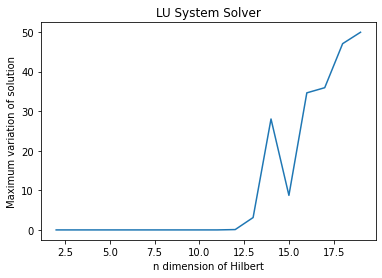

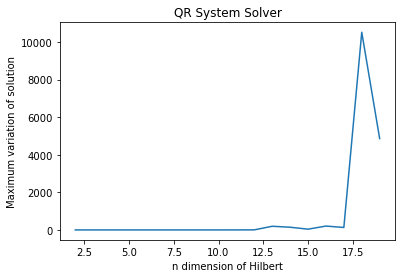

In [6]:
def maxbnew(n):
    #Solve Hx=b
    b=np.ones((n,1))
    xlu=LUsolve(Hilbert(n), b)
    xqr=QRsolve(Hilbert(n),b)
    bnew=np.ones((n,1))
    bnew[0]=bnew[0]+10**(-15)
    xlunew=LUsolve(Hilbert(n),bnew)
    xqrnew=QRsolve(Hilbert(n),bnew)
    maxbnewlu=np.max(np.abs(xlu-xlunew))
    maxbnewqr=np.max(np.abs(xqr-xqrnew))
    return maxbnewlu,maxbnewqr

xdata=list()
ydatalu=list() 
ydataqr=list() 
for i in range(2,20):
    xdata.append(i)
    maxb=maxbnew(i)
    ydatalu.append(maxb[0])
    ydataqr.append(maxb[1])
    
plt.plot(xdata,ydatalu)
plt.title('LU System Solver')
plt.xlabel('n dimension of Hilbert')
plt.ylabel('Maximum variation of solution')
plt.show()
plt.plot(xdata,ydataqr)
plt.title('QR System Solver')
plt.xlabel('n dimension of Hilbert')
plt.ylabel('Maximum variation of solution')
plt.show()

Όπως παρατηρείται, για μεγάλα n οι μέγιστες απόλυτες διαφορές μεγεθύνονται εκθετικά και απρόβλεπτα (μεγάλη αβεβαιότητα) ενώ η τάξη μεγέθους της διαφοράς για το QR είναι πολύ μεγαλύτερη. Συνεπώς η μέθοδος QR είναι πιο πιθανό να μας οδηγήσει σε μεγαλύτερα σφάλματα, καθώς οι ελάχιστες μεταβολές που μπορεί να προκύψουν από τις αριθμητικές μεθόδους του υπολογιστή επηρεάζουν σε πολύ μεγαλύτερη ποσότητα την έξοδο.

Η τελευταία δοκιμή αφορά τον υπολογισμό του αντιστρόφου πίνακα Hilbert και τον υπολογισμό του γινομένου $H \cdot H^{-1}$ το οποίο πρέπει να ισούται με τον μοναδιαίο πίνακα. Για τους λόγους αυτούς δοκιμάζεται η έτοιμη συνάρτηση np.linalg.inv():

In [7]:
def maxerrorinverse(n):
    H=Hilbert(n)
    H_1=np.linalg.inv(H)
    maxerror=np.linalg.norm((np.identity(n))-np.dot(H,H_1))
    return maxerror
def hh_1(n):
    H=Hilbert(n)
    H_1=np.linalg.inv(H)
    p=np.dot(H,H_1)
    
    return p
print("n=3:\n",hh_1(3),"\n")
print("n=5:\n",hh_1(5),"\n")
print("n=7:\n",hh_1(7),"\n")

n=3:
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.88178420e-16  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.10542736e-15  1.00000000e+00]] 

n=5:
 [[ 1.00000000e+00 -4.54747351e-13 -1.81898940e-12  0.00000000e+00
   0.00000000e+00]
 [-1.42108547e-14  1.00000000e+00  0.00000000e+00 -5.45696821e-12
  -2.72848411e-12]
 [ 0.00000000e+00 -4.54747351e-13  1.00000000e+00  0.00000000e+00
  -9.09494702e-13]
 [ 0.00000000e+00  2.27373675e-13  0.00000000e+00  1.00000000e+00
  -9.09494702e-13]
 [ 1.42108547e-14 -2.27373675e-13  0.00000000e+00 -1.81898940e-12
   1.00000000e+00]] 

n=7:
 [[ 1.00000000e+00  1.45519152e-11 -1.16415322e-10  0.00000000e+00
   0.00000000e+00  9.31322575e-10  2.32830644e-10]
 [-2.27373675e-13  1.00000000e+00  3.49245965e-10 -9.31322575e-10
  -1.86264515e-09 -1.86264515e-09  2.32830644e-10]
 [-9.09494702e-13  0.00000000e+00  1.00000000e+00 -4.65661287e-10
  -1.86264515e-09 -9.31322575e-10  6.98491931e-10]
 [-4.54747351e-13 -2.91038305e-11  1.16415322e-

Παρατηρούμε ότι το σφάλμα είναι πολύ μικρό, ωστόσο για μεγαλύτερα n αυξάνεται επίσης εκθετικά:

In [8]:
print(maxerrorinverse(3),"\n",maxerrorinverse(5),"\n",maxerrorinverse(7))

1.0087767680389479e-14 
 7.710642672568372e-12 
 6.049550921680026e-09


Τέλος, για διάφορες διαστάσεις ενδεικτικά από 2 έως 20 παρουσιάζονται οι τιμές της $L_2$ νόρμας της διαφοράς του υπολογισμένου γινομένου από τον μοναδιαίο πίνακα (μετρική σφάλματος).

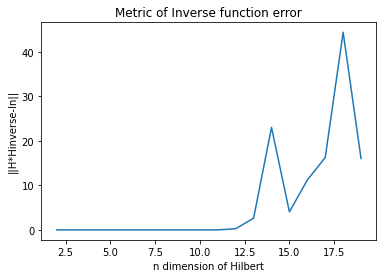

In [9]:
xdata=list()
ydata=list()
for i in range(2,20):
    xdata.append(i)
    ydata.append(maxerrorinverse(i))
    
plt.plot(xdata,ydata)
plt.title('Metric of Inverse function error')
plt.xlabel('n dimension of Hilbert')
plt.ylabel('||Η*Ηinverse-In||')
plt.show()

Παρατηρούμε και εδώ ότι όσο αυξάνεται το n το σφάλμα μεγεθύνεται πάλι εκθετικά και απρόβλεπτα. Συνεπώς, οι πίνακες Hilbert παρουσιάζουν ιδιαίτερη δυσκολία στην ακριβή ή προσεγγιστική αντιμετώπισή τους με μεθόδους του υπολογιστή καθώς όπως διαπιστώθηκε παρουσιάζουν τεράστιες μεταβολές στην έξοδο σε σχέση με την είσοδό τους ως συστήματα. Τέλος, η μέθοδος η οποία θα έδινε τα ελάχιστα σφάλματα υπολοίπων κατά την αριθμητική επίλυση με τον υπολογιστή θα είχε και καλύτερες επιδόσεις στις πράξεις με πίνακες Hilbert.

# Πρόβλημα Προσέγγισης

Για το παρόν πρόβλημα προσέγγισης ζητείται να κατασκευαστεί πολυώνυμο 4ου βαθμού που θα προσεγγίζει βέλτιστα μια καμπύλη. Η μέθοδος που θα υλοποιηθεί αξιοποιεί την επίλυση γραμμικών συστημάτων και ονομάζεται μέθοδος ελαχίστων τετραγώνων. Έτσι σύμφωνα με τη μέθοδο αυτή:

To πολυώνυμο θα είναι της μορφής $a + bx + c{x^2} + d{x^3} + e{x^4}$ από το οποίο παίρνω τους συντελεστές και δημιουργώ το διάνυσμα $X=[\begin{array}{*{20}{c}}a&b&c&d&e \end{array}]$. 
Έπειτα ορίζω τον πίνακα $A=[A_i]=[\begin{array}{*{20}{c}}1&{{t_i}}&{{t_i}^2}&{{t_i}^3}&{{t_i}^4} \end{array}]$ όπου $A_i$ γραμμή του πίνακα για κάθε σημείο t.

Στη συνέχεια βρίσκω το γινόμενο $A^{T}A$, ορίζω το διάνυσμα των δεδομένων $b=[\begin{array}{*{20}{c}}
  {{y_1}}&{{y_2}}&{...}&{{y_{49}}} 
\end{array}]$ και η λύση του συστήματος γίνεται:

$A^{T}A \cdot X= A^{T}b \Rightarrow  X=(A^{T}A)^{-1}A^{T}b $. Η υλοποίηση σε κώδικα είναι:


LU Polynomial:  [  0.95685567   1.04393892 -13.28764162  12.5210036   -1.74351697]
QR Polynomial:  [  0.95685566   1.04393913 -13.28764256  12.52100506  -1.7435177 ]
LU Square Errors: 0.3854542613997605 
QR Square Errors: 0.3854542610117355


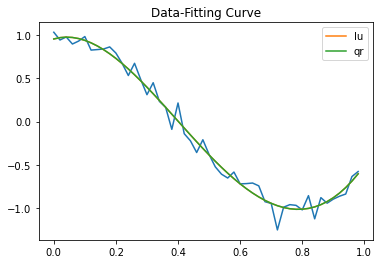

In [10]:
t=np.array([i/50 for i in range (50)])
y=np.array([0 for i in range (50)])

y=np.cos(4*t)+0.1*np.random.randn(t.shape[0])
coeflu=np.array([0, 0, 0, 0, 0])
coefqr=np.array([0, 0 ,0 ,0 ,0])
A=np.array(np.zeros((50,5)))
for j in range (0,5):
    for i in range(0,50):
        A[i][j]=t[i]**j
At=A.T
Amult=np.dot(At,A)
b=np.dot(At,y)
coeflu=LUsolve(Amult, b)
print("LU Polynomial: ",coeflu)
Amult=np.dot(At,A)
coefqr=QRsolve(Amult, b)
print("QR Polynomial: ",coefqr)
polylu=[np.polyval(np.flip(coeflu),i) for i in t]
polyqr=[np.polyval(np.flip(coefqr),i) for i in t]

qrerr=0
luerr=0

#luerr2=(np.linalg.norm(y-np.dot(A,np.transpose(coeflu))))**2
#qrerr2=(np.linalg.norm(y-np.dot(A,np.transpose(coefqr))))**2
for i in range (0,49):
    luerr=luerr+(polylu[i]-y[i])**2
    qrerr=qrerr+(polyqr[i]-y[i])**2


print("LU Square Errors:",luerr,"\nQR Square Errors:",qrerr)

plt.plot(t,y)
plt.plot(t,polylu,label='lu')
plt.plot(t,polyqr,label='qr')
plt.title("Data-Fitting Curve")
plt.legend()
plt.show()

Παρατηρώ ότι και οι δύο μέθοδοι έχουν πολύ καλή ακρίβεια στην προσέγγιση της καμπύλης δίνοντας παρόμοια αποτελέσματα έως και το 4ο δεκαδικό ψηφίο των συντελεστών του πολυωνύμου.Συνεπώς, οι καμπύλες φαίνεται στο διάγραμμα να ταυτίζονται και να ακολουθούν πιστά τη διαδρομή των δεδομένων. Το άθροισμα των τετραγωνικών σφαλμάτων που υπολογίστηκε από τη σχέση $\sum\limits_{i = 1}^{n}(y_i-P(x_i))^{2}$ είναι επίσης πολύ κοντά και στις δύο μεθόδους (ελαφρά υπερτερεί η LU, όπως ήταν αναμενόμενο). Έτσι, σε ένα πρακτικό πρόβλημα προσέγγισης παρατηρώ ότι και οι δύο αλγόριθμοι δουλεύουν πολύ καλά.